In [1]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

from terminal_optimization import container_objects
from terminal_optimization import container_defaults
from terminal_optimization import container_system

plt.style.use('seaborn-darkgrid')

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 10

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year < 2026:
        demand.append(200_000)
    else:
        demand.append(600_000)

scenario_data={'year': years, 'volume': demand}

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]


# plot scenarios 
if False:
    laden.plot_demand()

   
    

## 0.2 Generate vessels

In [4]:
# instantiate vessels
handysize = container_objects.Vessel(**container_defaults.handysize_data)
handymax = container_objects.Vessel(**container_defaults.handymax_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)


vessels = [handysize, handymax, panamax] 


# 1. Instatiate terminal system

In [5]:
# Terminal_calcs=[]
# stack_cranes = ['rmg', 'rtg', 'sc', 'rs']
# # Cranes = [container_defaults.rmg', 'rtg', 'sc', 'rs']
# for crane in stack_cranes:   
#     Terminal_dummy = container_system.System(startyear = startyear, 
#                                              lifecycle = lifecycle, 
#                                              elements = demand + vessels, 
#                                              operational_hours = 7665,   # example Wijnand
#                                              debug=False,
#                                              stack_equipment = crane,
#                                              laden_stack = crane) 
#     NPV=Terminal_dummy.simulate()
#     Terminal_calcs.append(NPV)
# print(Terminal_calcs)


In [6]:
# rmg = Terminal_calcs[0]
# rtg = Terminal_calcs[1]
# sc = Terminal_calcs[2]
# rs = Terminal_calcs[3]

# plt.plot(rmg)
# plt.plot(rtg)
# plt.plot(sc)
# plt.plot(rs)
# plt.ylabel('PV')
# plt.show()


In [15]:
Terminal = container_system.System(startyear = startyear, 
                         lifecycle = lifecycle, 
                         elements = demand + vessels, 
                         operational_hours = 7665,   # example Wijnand
                         debug=False,
                         crane_type_defaults=container_defaults.sts_crane_data) 


# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [16]:
Terminal.simulate()

0 0 0 0 0
0 0 0 0 0
20960.0 50005.728 2937.6 6400.0 866.25
20960.0 50005.728 2937.6 6400.0 866.25
20960.0 50005.728 2937.6 6400.0 866.25
20960.0 50005.728 2937.6 6400.0 866.25
20960.0 50005.728 2937.6 6400.0 866.25
20960.0 75008.592 2937.6 12800.0 2598.75
43950.5 75008.592 2937.6 12800.0 2598.75
43950.5 75008.592 2937.6 12800.0 2598.75
PV: [-1.46235840e+07 -5.49988588e+07  9.11206691e+07  9.21815283e+07
  9.31156413e+07  9.39381510e+07  1.49668542e+08  2.67413236e+08
  2.88454102e+08  2.89833549e+08]
NPV: 1296102975.5829537
PV: [-1.46235840e+07 -5.49988588e+07  9.11206691e+07  9.21815283e+07
  9.31156413e+07  9.39381510e+07  1.49668542e+08  2.67413236e+08
  2.88454102e+08  2.89833549e+08]
NPV: 1296102975.5829537


array([-1.46235840e+07, -5.49988588e+07,  9.11206691e+07,  9.21815283e+07,
        9.31156413e+07,  9.39381510e+07,  1.49668542e+08,  2.67413236e+08,
        2.88454102e+08,  2.89833549e+08])

## Report all elements

In [9]:
if False: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__)

In [10]:
#Terminal.terminal_elements_plot()

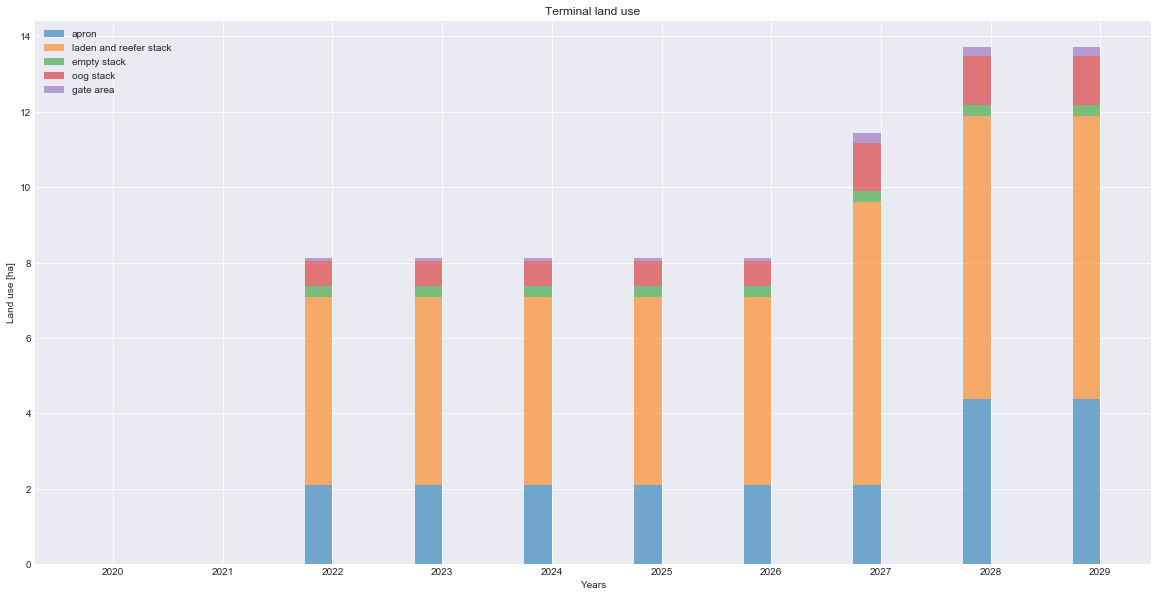

In [11]:
Terminal.land_use_plot()

In [12]:
# add cash flow information for each of the Terminal elements
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

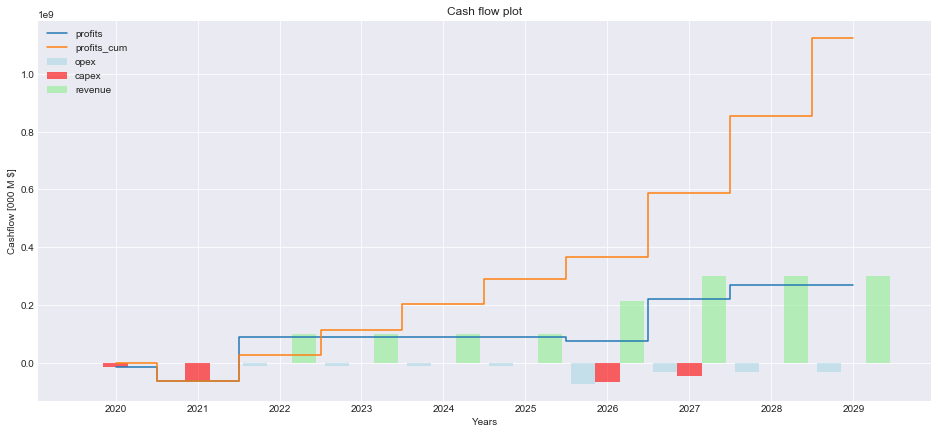

In [13]:
Terminal.cashflow_plot(cash_flows)

## SandBox

In [14]:
Terminal.NPV()

PV: [-1.46235840e+07 -5.49988588e+07  9.11206691e+07  9.21815283e+07
  9.31156413e+07  9.39381510e+07  1.49668542e+08  2.67413236e+08
  2.88454102e+08  2.89833549e+08]
NPV: 1296102975.5829537


array([-1.46235840e+07, -5.49988588e+07,  9.11206691e+07,  9.21815283e+07,
        9.31156413e+07,  9.39381510e+07,  1.49668542e+08,  2.67413236e+08,
        2.88454102e+08,  2.89833549e+08])